In [191]:
import numpy as np 
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [423]:
y = [i/10 for i in range(-40,40)]
y = np.array(y)

X = [i**2 for i in y]
X = np.array(X)
X = X.reshape(1,80)

In [424]:
X.shape

(1, 80)

In [412]:
X

array([[1.600e+01, 1.521e+01, 1.444e+01, 1.369e+01, 1.296e+01, 1.225e+01,
        1.156e+01, 1.089e+01, 1.024e+01, 9.610e+00, 9.000e+00, 8.410e+00,
        7.840e+00, 7.290e+00, 6.760e+00, 6.250e+00, 5.760e+00, 5.290e+00,
        4.840e+00, 4.410e+00, 4.000e+00, 3.610e+00, 3.240e+00, 2.890e+00,
        2.560e+00, 2.250e+00, 1.960e+00, 1.690e+00, 1.440e+00, 1.210e+00,
        1.000e+00, 8.100e-01, 6.400e-01, 4.900e-01, 3.600e-01, 2.500e-01,
        1.600e-01, 9.000e-02, 4.000e-02, 1.000e-02, 0.000e+00, 1.000e-02,
        4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01, 3.600e-01, 4.900e-01,
        6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00, 1.440e+00, 1.690e+00,
        1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00, 3.240e+00, 3.610e+00,
        4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00, 5.760e+00, 6.250e+00,
        6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00, 9.000e+00, 9.610e+00,
        1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01, 1.296e+01, 1.369e+01,
        1.444e+01, 1.521e+01]])

In [422]:
X.reshape(1,80).shape

(1, 80)

In [414]:
print(X.shape)
print(X.T.shape)

(1, 80)
(80, 1)


In [415]:
np.random.rand(80,1)

array([[0.92738784],
       [0.6530038 ],
       [0.72394791],
       [0.0648851 ],
       [0.67097294],
       [0.38985843],
       [0.28498142],
       [0.53590063],
       [0.48858251],
       [0.52488969],
       [0.70374031],
       [0.74527436],
       [0.84893901],
       [0.09537552],
       [0.45775825],
       [0.28845765],
       [0.72912488],
       [0.95486982],
       [0.37253275],
       [0.65136937],
       [0.7145996 ],
       [0.9320917 ],
       [0.10347708],
       [0.58860215],
       [0.60787347],
       [0.9684965 ],
       [0.40758763],
       [0.66487297],
       [0.03251331],
       [0.58751278],
       [0.40461499],
       [0.34520277],
       [0.77893753],
       [0.37277535],
       [0.30464575],
       [0.99587895],
       [0.43457058],
       [0.03375459],
       [0.57861412],
       [0.7246581 ],
       [0.28434665],
       [0.70283309],
       [0.27614113],
       [0.53752994],
       [0.15961391],
       [0.75571581],
       [0.47611824],
       [0.053

In [425]:





def params():

    w1 = np.random.rand(80,2) -0.5
    b1 = np.random.rand(1) -0.5 
    w2 = np.random.rand(80,2) -0.5
    b2 = np.random.rand(1) -0.5
    w3 = np.random.rand(80,2) -0.5
    w4 = np.random.rand(80,2) -0.5
    return w1, b1, w2, b2, w3, w4



def softplus(X):
    return np.log1p(1 + np.exp(X))


def forward(X,w1, b1, w2, b2, w3, w4):
    y1 = w1.dot(X) + b1
    X1 = softplus(y1)
    y2 = w2.dot(X) + b2
    X2 = softplus(y2)


    pred = w3*X1 + w4*X2

    return y1, X1, y2, X2, pred 




def deriv(X):
    return np.exp(X)/(1 + np.exp(X))




def backward(y1, X1, y2, X2, w1, w2, X, y, w3, w4, pred):
    
    dpred = -2*(y - pred)
    dw3 = dpred*X1
    dw4 = dpred * X2 
    dw1 = dpred*w3*deriv(y1)*(X)
    dw2 = dpred*w4*deriv(y2)*(X) 
    db1 = dpred.dot(w3)*(deriv(y1))
    db2 = dpred.dot(w4)*(deriv(y2))

    return dw1, dw2, dw3, dw4, db1, db2



def update_params(w1, b1, w2, b2, w3, w4, dw1, dw2, dw3, dw4, db1, db2, alpha):


    b1 = b1 - alpha*db1
    b2 = b2 -alpha*db2
    w1 = w1 - alpha*dw1
    w2 = w2- alpha*dw2
    w3 = w3- alpha*dw3
    w4 = w4- alpha*dw4


    return b1, b2, w1, w2, w3, w4







def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size





def train(X,y, alpha, iterations):
    w1, b1, w2, b2, w3, w4 = params()
    for i in range(iterations):

        y1, X1, y2, X2, pred = forward(X,w1, b1, w2, b2, w3, w4)
        dw1, dw2, dw3, dw4, db1, db2 = backward(y1, X1, y2, X2, w1, w2, X, y, w3, w4, pred)
        b1, b2, w1, w2, w3, w4 = update_params(w1, b1, w2, b2, w3, w4, dw1, dw2, dw3, dw4, db1, db2, alpha)
        if i % 10 == 0:
                print("Iteration: ", i)
                print(mean_squared_error(pred,X) **.5)
    return w1, b1, w2, b2, w3, w4

    


In [426]:
w1.shape

(80, 2)

In [427]:
X.shape

(1, 80)

In [428]:
X.dot(w1)

array([[10.90749667, 18.18429975]])

In [405]:
(w1.dot(X))

ValueError: shapes (80,2) and (80,) not aligned: 2 (dim 1) != 80 (dim 0)

In [388]:
w1.dot(X)

ValueError: shapes (80,1) and (80,) not aligned: 1 (dim 1) != 80 (dim 0)

In [389]:
X.dot(w1)

array([-29.49224762])

In [390]:
dpred=-2*(y - pred)

In [391]:
dw3 = dpred.dot(X1)
dw3

array([[ 303.25417512,  288.18486902,  273.56926934, ...,  259.4155381 ,
         273.56926934,  288.18486902],
       [-158.51857806, -154.41481195, -150.47213427, ..., -146.69447762,
        -150.47213427, -154.41481195],
       [-393.8586067 , -379.59627881, -365.82152538, ..., -352.54523466,
        -365.82152538, -379.59627881],
       ...,
       [ 319.42062821,  303.74283793,  288.53817332, ...,  273.81509079,
         288.53817332,  303.74283793],
       [ 363.26914643,  345.58346811,  328.43584263, ...,  311.83626566,
         328.43584263,  345.58346811],
       [ -41.54311139,  -42.1286335 ,  -42.7252341 , ...,  -43.33412678,
         -42.7252341 ,  -42.1286335 ]])

In [392]:
pred

array([[ 0.53971096,  0.51579791,  0.49267392, ...,  0.47036021,
         0.49267392,  0.51579791],
       [-0.68866468, -0.69120339, -0.69382635, ..., -0.69654585,
        -0.69382635, -0.69120339],
       [-2.95632935, -2.81709368, -2.68185852, ..., -2.55065765,
        -2.68185852, -2.81709368],
       ...,
       [ 0.31077216,  0.30861541,  0.3066974 , ...,  0.3050231 ,
         0.3066974 ,  0.30861541],
       [ 1.23483803,  1.16610265,  1.09935992, ...,  1.034652  ,
         1.09935992,  1.16610265],
       [-1.09274912, -1.04358934, -0.99575453, ..., -0.94926097,
        -0.99575453, -1.04358934]])

In [393]:
softplus(X*w1 + b1)

array([[0.70019421, 0.70180781, 0.70373359, ..., 0.70601765, 0.70373359,
        0.70180781],
       [2.54717534, 2.44642361, 2.35022699, ..., 2.25857898, 2.35022699,
        2.44642361],
       [1.0502001 , 1.05148576, 1.05274256, ..., 1.05397025, 1.05274256,
        1.05148576],
       ...,
       [0.72857769, 0.73326267, 0.7384112 , ..., 0.7440446 , 0.7384112 ,
        0.73326267],
       [5.77815522, 5.49195727, 5.21366093, ..., 4.94341301, 5.21366093,
        5.49195727],
       [0.7078297 , 0.71053651, 0.7136494 , ..., 0.71720997, 0.7136494 ,
        0.71053651]])

In [394]:
def softplus_np(x): return np.log1p(np.exp(-np.abs(x))) + np.maximum(x, 0)

softplus_np(X*w1 + b1)

array([[0.01404475, 0.0172469 , 0.02106193, ..., 0.02557739, 0.02106193,
        0.0172469 ],
       [2.4656371 , 2.35583921, 2.25002259, ..., 2.14820718, 2.25002259,
        2.35583921],
       [0.61962065, 0.6215975 , 0.62352867, ..., 0.62541383, 0.62352867,
        0.6215975 ],
       ...,
       [0.06964853, 0.07868359, 0.08856763, ..., 0.09932928, 0.08856763,
        0.07868359],
       [5.77505601, 5.48782899, 5.20820436, ..., 4.93625724, 5.20820436,
        5.48782899],
       [0.02915258, 0.03448142, 0.04059253, ..., 0.04756014, 0.04059253,
        0.03448142]])

In [395]:
def safe_softplus(x):
    inRanges = (x < 100)
    return np.log1p(1 + np.exp(x*inRanges))*inRanges + x*(1-inRanges)
  

safe_softplus(X*w1 + b1)

array([[0.70019421, 0.70180781, 0.70373359, ..., 0.70601765, 0.70373359,
        0.70180781],
       [2.54717534, 2.44642361, 2.35022699, ..., 2.25857898, 2.35022699,
        2.44642361],
       [1.0502001 , 1.05148576, 1.05274256, ..., 1.05397025, 1.05274256,
        1.05148576],
       ...,
       [0.72857769, 0.73326267, 0.7384112 , ..., 0.7440446 , 0.7384112 ,
        0.73326267],
       [5.77815522, 5.49195727, 5.21366093, ..., 4.94341301, 5.21366093,
        5.49195727],
       [0.7078297 , 0.71053651, 0.7136494 , ..., 0.71720997, 0.7136494 ,
        0.71053651]])

In [396]:
np.exp(X)/(np.ones(80,) + np.exp(X))

array([0.99999989, 0.99999975, 0.99999946, 0.99999887, 0.99999765,
       0.99999521, 0.99999046, 0.99998136, 0.99996429, 0.99993295,
       0.99987661, 0.99977742, 0.99960649, 0.99931814, 0.99884211,
       0.99807327, 0.99685879, 0.99498353, 0.99215498, 0.9879908 ,
       0.98201379, 0.97366068, 0.96231211, 0.94734988, 0.92824246,
       0.90465054, 0.87653295, 0.84422416, 0.80845465, 0.77029895,
       0.73105858, 0.6921095 , 0.65475346, 0.62010643, 0.58904043,
       0.5621765 , 0.53991488, 0.52248482, 0.50999867, 0.50249998,
       0.5       , 0.50249998, 0.50999867, 0.52248482, 0.53991488,
       0.5621765 , 0.58904043, 0.62010643, 0.65475346, 0.6921095 ,
       0.73105858, 0.77029895, 0.80845465, 0.84422416, 0.87653295,
       0.90465054, 0.92824246, 0.94734988, 0.96231211, 0.97366068,
       0.98201379, 0.9879908 , 0.99215498, 0.99498353, 0.99685879,
       0.99807327, 0.99884211, 0.99931814, 0.99960649, 0.99977742,
       0.99987661, 0.99993295, 0.99996429, 0.99998136, 0.99999

In [397]:
np.exp(X)/(1 + np.exp(X))

array([0.99999989, 0.99999975, 0.99999946, 0.99999887, 0.99999765,
       0.99999521, 0.99999046, 0.99998136, 0.99996429, 0.99993295,
       0.99987661, 0.99977742, 0.99960649, 0.99931814, 0.99884211,
       0.99807327, 0.99685879, 0.99498353, 0.99215498, 0.9879908 ,
       0.98201379, 0.97366068, 0.96231211, 0.94734988, 0.92824246,
       0.90465054, 0.87653295, 0.84422416, 0.80845465, 0.77029895,
       0.73105858, 0.6921095 , 0.65475346, 0.62010643, 0.58904043,
       0.5621765 , 0.53991488, 0.52248482, 0.50999867, 0.50249998,
       0.5       , 0.50249998, 0.50999867, 0.52248482, 0.53991488,
       0.5621765 , 0.58904043, 0.62010643, 0.65475346, 0.6921095 ,
       0.73105858, 0.77029895, 0.80845465, 0.84422416, 0.87653295,
       0.90465054, 0.92824246, 0.94734988, 0.96231211, 0.97366068,
       0.98201379, 0.9879908 , 0.99215498, 0.99498353, 0.99685879,
       0.99807327, 0.99884211, 0.99931814, 0.99960649, 0.99977742,
       0.99987661, 0.99993295, 0.99996429, 0.99998136, 0.99999

In [398]:
w1.dot(X)

ValueError: shapes (80,1) and (80,) not aligned: 1 (dim 1) != 80 (dim 0)

In [399]:
w1, b1, w2, b2, w3, w4 = params()

y1, X1, y2, X2, pred = forward(X, w1, b1, w2, b2, w3, w4)

ValueError: shapes (80,2) and (80,) not aligned: 2 (dim 1) != 80 (dim 0)

In [400]:
y1

array([[ 4.58440982,  4.35234274,  4.12615077, ...,  3.90583392,
         4.12615077,  4.35234274],
       [-3.79212433, -3.61060004, -3.4336713 , ..., -3.26133811,
        -3.4336713 , -3.61060004],
       [ 2.97911354,  2.82630796,  2.67737088, ...,  2.53230229,
         2.67737088,  2.82630796],
       ...,
       [-3.1567971 , -3.00664209, -2.86028848, ..., -2.71773625,
        -2.86028848, -3.00664209],
       [-2.36854742, -2.25731224, -2.14889314, ..., -2.04329012,
        -2.14889314, -2.25731224],
       [ 5.36806058,  5.09730074,  4.83339558, ...,  4.5763451 ,
         4.83339558,  5.09730074]])

In [345]:
pred.shape

(80, 80)

In [346]:
np.array([2,1,3]).dot(np.array([1,2,3]))

13

In [347]:
X.shape

(80,)

In [348]:
-2*sum(y - pred)

array([ 609.02731913,  594.42765918,  579.78275509,  565.09237828,
        550.35638302,  535.57471946,  520.74744534,  505.87473586,
        490.95689117,  475.9943409 ,  460.9876455 ,  445.93749398,
        430.84469785,  415.7101812 ,  400.53496688,  385.32015915,
        370.06692316,  354.77646203,  339.44999256,  324.08872032,
        308.69381497,  293.26638632,  277.8074613 ,  262.31796246,
        246.79868856,  231.25029863,  215.67330084,  200.06804784,
        184.43473932,  168.77343218,  153.08405725,  137.36644129,
        121.62033211,  105.84542493,   90.04138807,   74.2078867 ,
         58.34460361,   42.45125664,   26.52761257,   10.57349763,
         -5.4111953 ,  -21.42650237,  -37.47238743,  -53.54874336,
        -69.65539639,  -85.7921133 , -101.95861193, -118.15457507,
       -134.37966789, -150.63355871, -166.91594275, -183.22656782,
       -199.56526068, -215.93195216, -232.32669916, -248.74970137,
       -265.20131144, -281.68203754, -298.1925387 , -314.73361

In [349]:
pred.shape

(80, 80)

In [350]:
y1, X1, y2, X2, pred  = forward(X, w1, b1, w2, b2, w3, w4)

In [351]:
w1, b1, w2, b2, w3, w4 = train(X,y,0.01,500)

Iteration:  0


ValueError: y_true and y_pred have different number of output (80!=1)

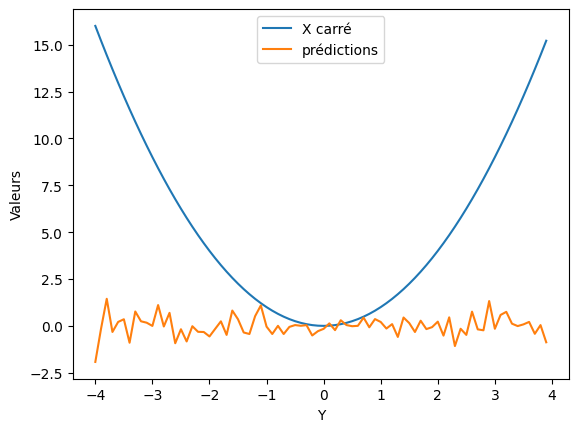

In [291]:
plt.plot(y, X, label='X carré')  # Première courbe
plt.plot(y, pred, label='prédictions')  # Deuxième courbe

# Personnalisation du graphique
plt.xlabel('Y')
plt.ylabel('Valeurs')
#plt.title('Comparaison de X et Z en fonction de Y')
plt.legend()

# Affichage du graphique
plt.show()

In [107]:
import numpy as np

# Génération des données
y = np.array([i / 10 for i in range(-40, 40)])
X = np.array([i ** 2 for i in y]).reshape(-1, 1)

# Initialisation des paramètres
def params():
    w1 = np.random.rand(80, 1) - 0.5
    b1 = np.random.rand(80, 1) - 0.5
    w2 = np.random.rand(80, 1) - 0.5
    b2 = np.random.rand(80, 1) - 0.5
    w3 = np.random.rand(80, 1) - 0.5
    w4 = np.random.rand(80, 1) - 0.5
    return w1, b1, w2, b2, w3, w4

# Fonction Softplus
def softplus(X):
    return np.log(1 + np.exp(X))

# Passage avant (Forward)
def forward(X, w1, b1, w2, b2, w3, w4):
    y1 = np.dot(w1.T, X) + b1
    X1 = softplus(y1)
    y2 = np.dot(w2.T, X) + b2
    X2 = softplus(y2)
    pred = np.dot(w3.T, X1) + np.dot(w4.T, X2)
    return y1, X1, y2, X2, pred

# Dérivée de Softplus
def deriv(X):
    return np.exp(X) / (1 + np.exp(X))

# Passage arrière (Backward)
def backward(y1, X1, y2, X2, w1, w2, X, Y, w3, w4, pred):
    dpred = -2 * (Y - pred).reshape(-1, 1)
    dw3 = dpred * X1
    dw4 = dpred * X2
    dw1 = deriv(y1) * np.dot(X, dpred.T)
    dw2 = deriv(y2) * np.dot(X, dpred.T)
    db1 = deriv(y1) * dpred
    db2 = deriv(y2) * dpred
    return dw1, dw2, dw3, dw4, db1, db2

# Mise à jour des paramètres
def update_params(w1, b1, w2, b2, w3, w4, dw1, dw2, dw3, dw4, db1, db2, alpha):
    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    w3 -= alpha * dw3
    w4 -= alpha * dw4
    return w1, b1, w2, b2, w3, w4

# Entraînement du modèle
def train(X, Y, alpha, iterations):
    w1, b1, w2, b2, w3, w4 = params()
    for i in range(iterations):
        y1, X1, y2, X2, pred = forward(X, w1, b1, w2, b2, w3, w4)
        dw1, dw2, dw3, dw4, db1, db2 = backward(y1, X1, y2, X2, w1, w2, X, Y, w3, w4, pred)
        w1, b1, w2, b2, w3, w4 = update_params(w1, b1, w2, b2, w3, w4, dw1, dw2, dw3, dw4, db1, db2, alpha)
        if i % 10 == 0:
            print(f"Iteration {i}: Loss = {np.mean((Y - pred)**2)}")
    return w1, b1, w2, b2, w3, w4


In [108]:
train(X,y,0.1,500)

ValueError: non-broadcastable output operand with shape (80,1) doesn't match the broadcast shape (80,80)